# World Trading Data (2000 - 2022)

The dataset contains import and export percentages for Computer, communication, and other services of every trading country from 2000 to 2022.<br>
The EDA focuses on the trade market of India and its neighboring countries and compares the imports and exports of each country over the years. An insight into the Time Series Analysis of the Indian trade market has been provided at the end.<br>
Data source: <a href="https://www.kaggle.com/datasets/js1js2js3js4js5/world-trading-dataset-2000-2022">World Trading Data</a>

In [30]:
# Importing all the libraries needed

# Libraries for Data Manipulation
import pandas as pd
import numpy as np

# Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Time Series Analysis
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

# Displaying all the columns of the dataset
pd.set_option('display.max_columns', None)

# Setting style for the plots
sns.set_style('darkgrid')

In [2]:
# Reading the data
trade_data = pd.read_csv("import export of all countries.csv")
trade_data.head()

,Country Name,Country Code,Series Name,Series Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Afghanistan,AFG,"Computer, communications and other services (%...",TX.VAL.OTHR.ZS.WT,..,..,..,..,..,..,..,..,78.6041255381486,82.1091621274838,81.1885585305929,75.8215190278826,71.6414822956968,45.9737889764664,63.2306116183586,69.9228520489853,61.6820803153718,64.7570637901986,65.5161335201523,63.7152197387,74.2730334447795,..,..
1,Afghanistan,AFG,"Computer, communications and other services (%...",TM.VAL.OTHR.ZS.WT,..,..,..,..,..,..,..,..,17.6359565699848,22.6377618902753,19.4921815173193,22.6655142894059,27.6930813335095,15.5771684883277,22.1439762358189,9.95141556609315,7.12335062040177,5.65917623811382,9.84758515938043,8.08242207437161,6.86897064136312,..,..
2,Albania,ALB,"Computer, communications and other services (%...",TX.VAL.OTHR.ZS.WT,7.358619123325,8.95170789163723,5.90334680796825,14.7159603884017,22.2346143670462,20.2448878857147,25.7575886338218,23.8347259664,25.0694962135901,18.2866694812893,26.3761800669312,28.9893856783402,26.4205823686089,22.443076205314,22.2698355560546,23.8484079568288,27.0355896123166,30.5054951702817,29.8507575844571,29.9953973251891,45.0203006979196,33.739551326013,28.9459187678644
3,Albania,ALB,"Computer, communications and other services (%...",TM.VAL.OTHR.ZS.WT,3.12273057371097,3.29618211999052,3.13424325576423,8.47678138144811,11.517742886808,19.5030662621851,17.5201366167892,15.186528249091,12.6517343344852,8.83892498790549,10.976118101843,8.13343001790963,7.87464448489331,9.94811721546489,8.92422019848482,9.88797505782306,10.3211948962875,10.2131352519654,9.16497904638247,9.85571335720699,19.4250975446543,16.3779124537161,8.72783944734901
4,Algeria,DZA,"Computer, communications and other services (%...",TX.VAL.OTHR.ZS.WT,..,..,..,..,..,36.6585563665855,53.7420382165606,51.336152015701,53.1884442476247,53.7004458889821,62.9447150594919,65.7213399656996,64.0881917608789,63.9333304240218,59.0982989712231,58.3702956687159,60.049199723822,61.2411761816798,62.9165796470092,62.7942609112587,72.0625718140325,69.5802827968949,63.3883711527065


# Preprocessing Stage

In [3]:
# Checking for null values
trade_data.isna().sum()

Country Name     3
Country Code     5
Series Name      5
Series Code      5
2000 [YR2000]    5
2001 [YR2001]    5
2002 [YR2002]    5
2003 [YR2003]    5
2004 [YR2004]    5
2005 [YR2005]    5
2006 [YR2006]    5
2007 [YR2007]    5
2008 [YR2008]    5
2009 [YR2009]    5
2010 [YR2010]    5
2011 [YR2011]    5
2012 [YR2012]    5
2013 [YR2013]    5
2014 [YR2014]    5
2015 [YR2015]    5
2016 [YR2016]    5
2017 [YR2017]    5
2018 [YR2018]    5
2019 [YR2019]    5
2020 [YR2020]    5
2021 [YR2021]    5
2022 [YR2022]    5
dtype: int64

In [4]:
# Dropping rows containing null values
trade_data.dropna(inplace=True)

In [5]:
# c1 contains the number of rows
c1 = trade_data.shape[0]

# Dropping duplicate rows
trade_data.drop_duplicates(inplace=True)

# c2 contains the number of unique rows
c2 = trade_data.shape[0]

print(f'{c1-c2} duplicate rows have been found in the dataset')

0 duplicate rows have been found in the dataset


In [6]:
# Dataframe Transformation
trade_data = pd.melt(trade_data, id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'], var_name='Year', value_name='Value')
trade_data.head()

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,Afghanistan,AFG,"Computer, communications and other services (%...",TX.VAL.OTHR.ZS.WT,2000 [YR2000],..
1,Afghanistan,AFG,"Computer, communications and other services (%...",TM.VAL.OTHR.ZS.WT,2000 [YR2000],..
2,Albania,ALB,"Computer, communications and other services (%...",TX.VAL.OTHR.ZS.WT,2000 [YR2000],7.358619123325
3,Albania,ALB,"Computer, communications and other services (%...",TM.VAL.OTHR.ZS.WT,2000 [YR2000],3.12273057371097
4,Algeria,DZA,"Computer, communications and other services (%...",TX.VAL.OTHR.ZS.WT,2000 [YR2000],..


In [7]:
# Getting unique values of the column 'Series Name'
trade_data['Series Name'].unique()

array(['Computer, communications and other services (% of commercial service exports)',
       'Computer, communications and other services (% of commercial service imports)'],
      dtype=object)

In [8]:
# Defining a dictionary
replacement = {'Computer, communications and other services (% of commercial service imports)': 'Service, Imports', 
               'Computer, communications and other services (% of commercial service exports)': 'Service, Exports'}

# Replacing 'Series Name' values with the value of dictionary replacement
trade_data['Series Name'].replace(replacement, inplace=True)

# Deleting the column 'Series Code'
trade_data.drop('Series Code', axis=1, inplace=True)

trade_data.head()

,Country Name,Country Code,Series Name,Year,Value
0,Afghanistan,AFG,"Service, Exports",2000 [YR2000],..
1,Afghanistan,AFG,"Service, Imports",2000 [YR2000],..
2,Albania,ALB,"Service, Exports",2000 [YR2000],7.358619123325
3,Albania,ALB,"Service, Imports",2000 [YR2000],3.12273057371097
4,Algeria,DZA,"Service, Exports",2000 [YR2000],..


In [9]:
# Extracting the year data from the column 'Year'
trade_data['Year'] = trade_data['Year'].apply(lambda x: x.split(' ')[0])

# Another method for extraction
#trade_data['Year'].str.split(' ').str[0]

trade_data.head()

,Country Name,Country Code,Series Name,Year,Value
0,Afghanistan,AFG,"Service, Exports",2000,..
1,Afghanistan,AFG,"Service, Imports",2000,..
2,Albania,ALB,"Service, Exports",2000,7.358619123325
3,Albania,ALB,"Service, Imports",2000,3.12273057371097
4,Algeria,DZA,"Service, Exports",2000,..


In [10]:
# Replacing '..' with a negative value
trade_data.replace(to_replace='..', value=-1, inplace=True)
trade_data.head()

,Country Name,Country Code,Series Name,Year,Value
0,Afghanistan,AFG,"Service, Exports",2000,-1
1,Afghanistan,AFG,"Service, Imports",2000,-1
2,Albania,ALB,"Service, Exports",2000,7.358619123325
3,Albania,ALB,"Service, Imports",2000,3.12273057371097
4,Algeria,DZA,"Service, Exports",2000,-1


In [11]:
# Converting the datatypes of the columns 'Year' and 'Value'
trade_data['Year'] = trade_data['Year'].astype(int)
trade_data['Value'] = trade_data['Value'].astype(float)
trade_data.head()

,Country Name,Country Code,Series Name,Year,Value
0,Afghanistan,AFG,"Service, Exports",2000,-1.000000
1,Afghanistan,AFG,"Service, Imports",2000,-1.000000
2,Albania,ALB,"Service, Exports",2000,7.358619
3,Albania,ALB,"Service, Imports",2000,3.122731
4,Algeria,DZA,"Service, Exports",2000,-1.000000


In [12]:
# Checking the datatypes
trade_data.dtypes

Country Name     object
Country Code     object
Series Name      object
Year              int32
Value           float64
dtype: object

In [13]:
# Rounding the digits of the column 'Value' to 2 decimal places
trade_data['Value'] = trade_data['Value'].round(2)
trade_data.head()

,Country Name,Country Code,Series Name,Year,Value
0,Afghanistan,AFG,"Service, Exports",2000,-1.00
1,Afghanistan,AFG,"Service, Imports",2000,-1.00
2,Albania,ALB,"Service, Exports",2000,7.36
3,Albania,ALB,"Service, Imports",2000,3.12
4,Algeria,DZA,"Service, Exports",2000,-1.00


In [14]:
# Dropping the rows containing negative entries in 'Value' column
temp = trade_data[trade_data['Value'] >= 0].reset_index(drop=True)
temp.head()

,Country Name,Country Code,Series Name,Year,Value
0,Albania,ALB,"Service, Exports",2000,7.36
1,Albania,ALB,"Service, Imports",2000,3.12
2,Angola,AGO,"Service, Exports",2000,80.76
3,Angola,AGO,"Service, Imports",2000,77.51
4,Antigua and Barbuda,ATG,"Service, Exports",2000,8.25


# EDA

** Imports and Exports over the years of India and her neighbouring countries : Afghanistan, Bangladesh, Bhutan, China, Maldives, Myanmar, Nepal, Pakistan, and Sri Lanka.

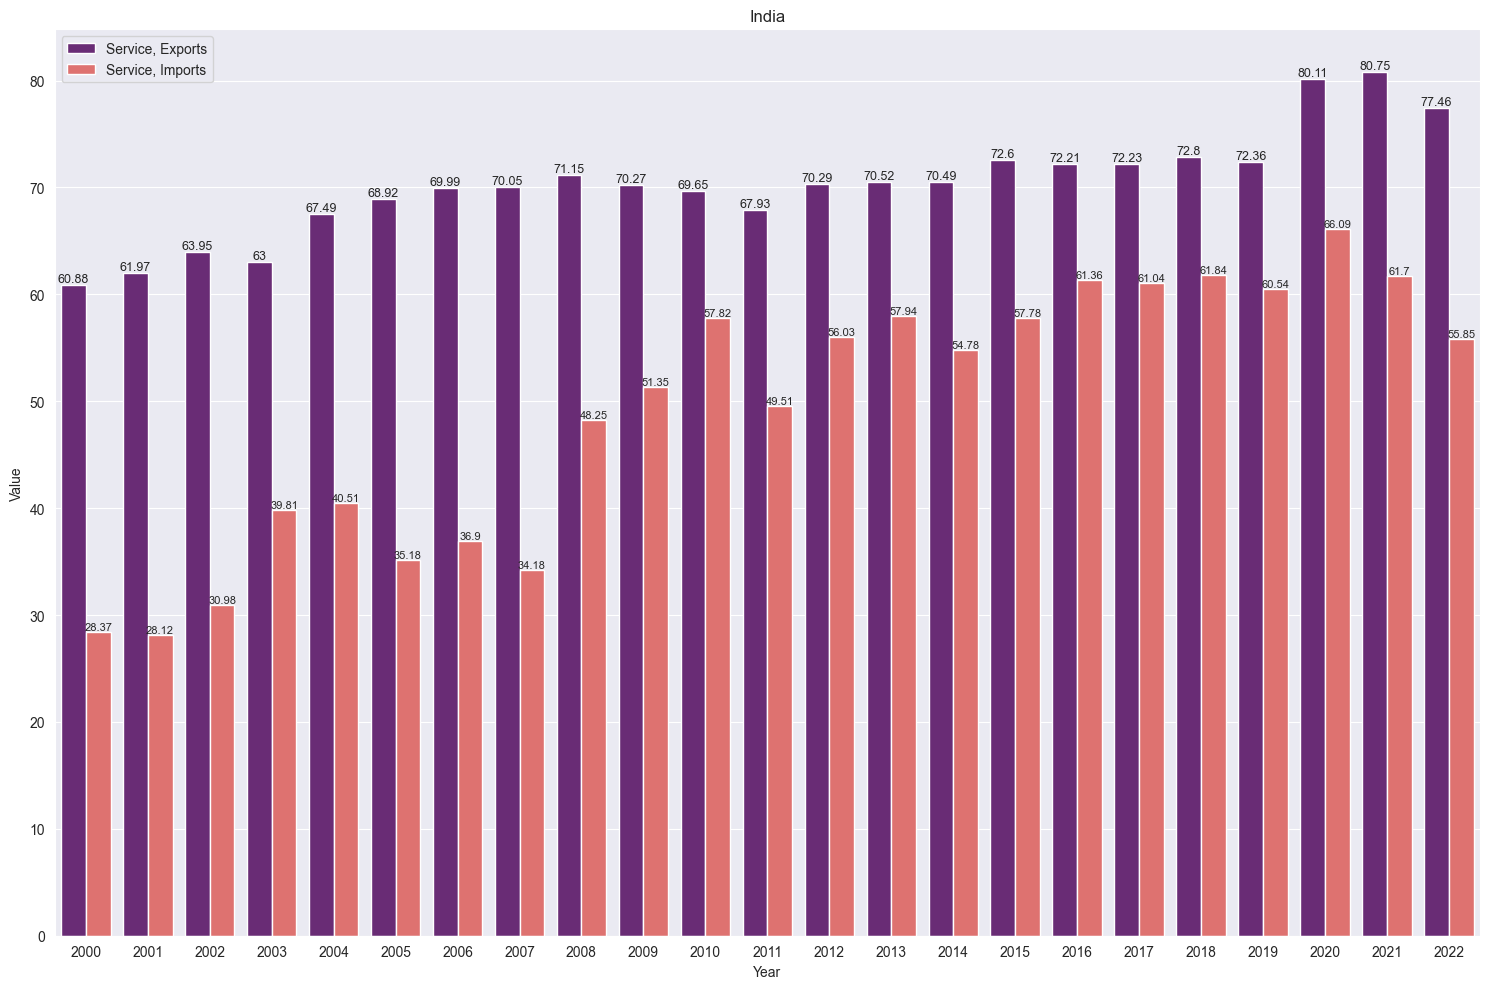

In [15]:
# c_name takes a country name as an input
c_name = 'India'

'''
Description : Plots the imports and exports of India and her neighbouring countries
Input: Country name, dataframe
Output: None
'''        
def cplots(c_name, data = temp):
    plt.figure(figsize=(15,10))
    ax = sns.barplot(x = 'Year', y = 'Value', data=temp[temp['Country Name'] == c_name], hue='Series Name', palette='magma')
    ax.bar_label(ax.containers[0], fontsize = 9)
    ax.bar_label(ax.containers[1], fontsize = 8)
    plt.title(c_name)
    plt.legend(loc = 'best')
    plt.tight_layout()
    plt.show()

cplots(c_name)

The highest computer and communication services import was in the year 2020 with 66.09% and the lowest was in the year 2001 with a value 28.12% whereas the exports peaked in the 2021 with 80.75% and was the lowest in the year 2000 with 60.88%. <br><br>Imports shows an fairly increasing trend from the year 2008 and the exports shows the same from 2000. It can be concluded that India exports more computer and communication services than importing them, hence a positive trade balance.

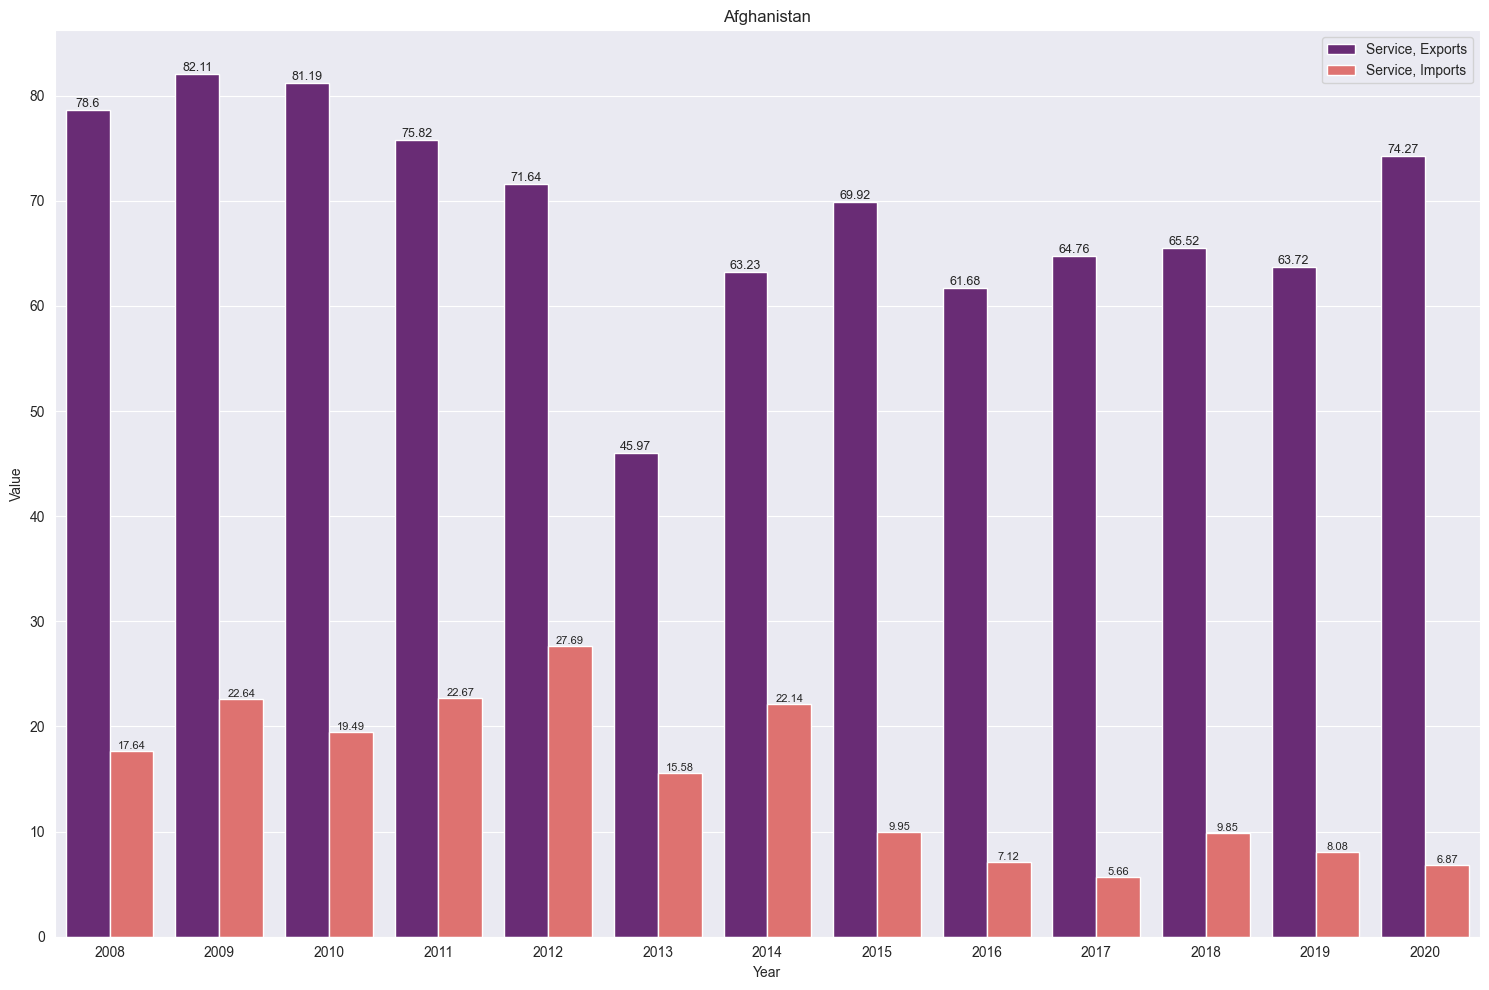

In [16]:
# Function call
cplots('Afghanistan')

Afghanistan started trading in the year 2008 and continued till 2020. Imports of Computer and communication services decreased over the years and it was lowest in the year 2017 and highest in 2012. They maintained an overall same percentage in exports, highest in 2009 and lowest in 2013 and a great positive trade balance.

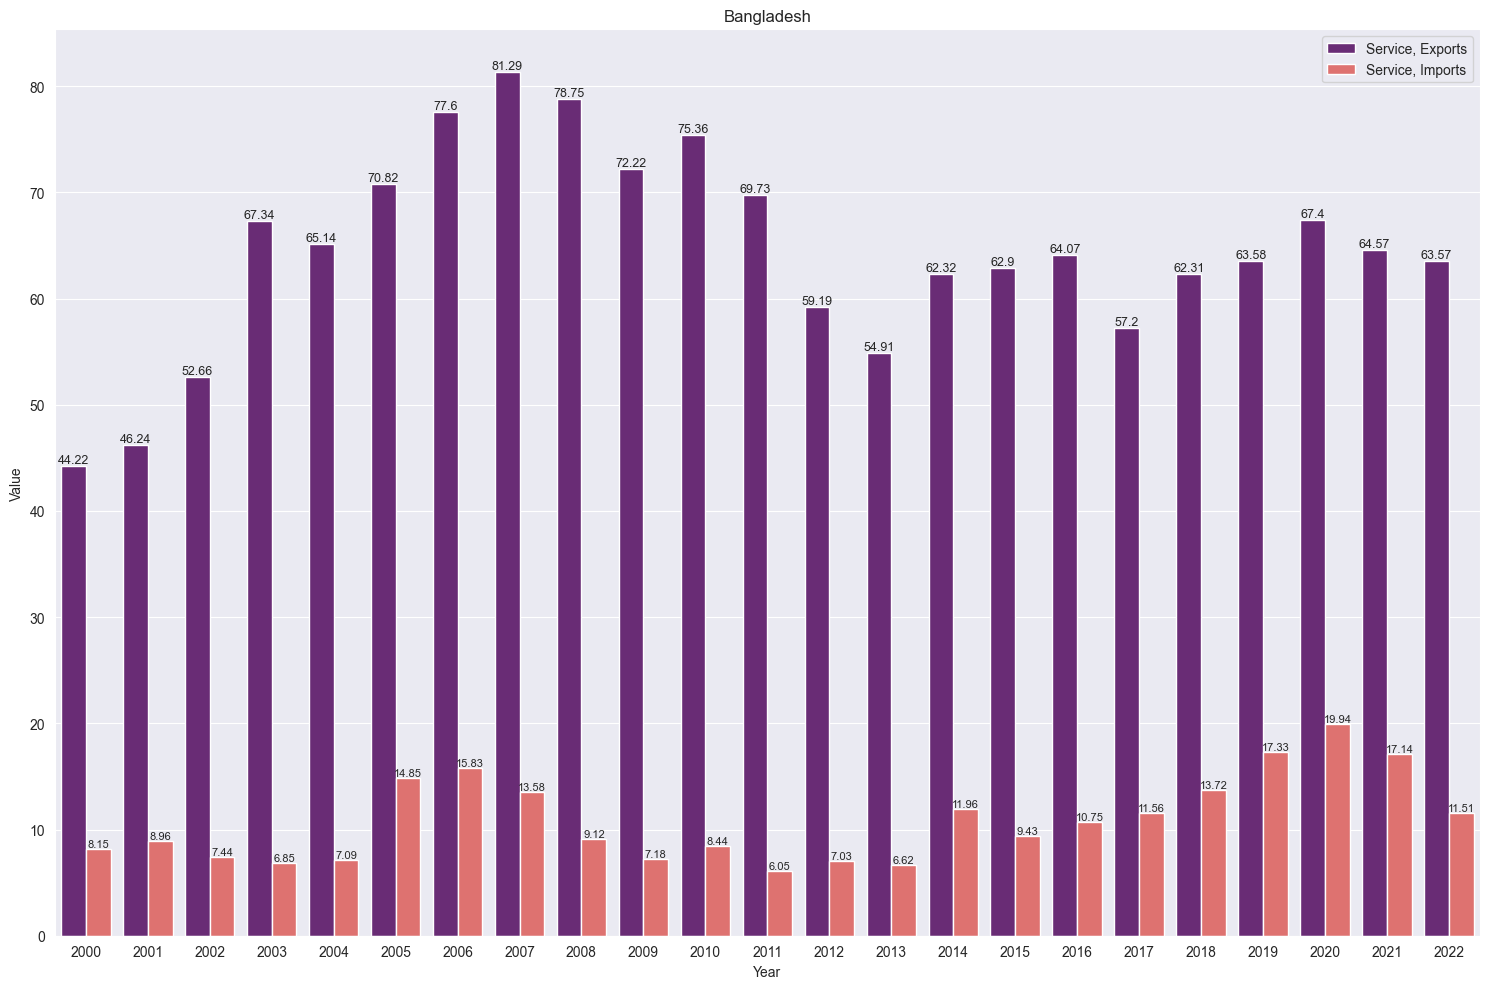

In [17]:
# Function call
cplots('Bangladesh')

The export percentage of Bangladesh is higher than import every year. Bangladesh has a significant role in exporting communication services and shows a significantly positive trade balance every year.

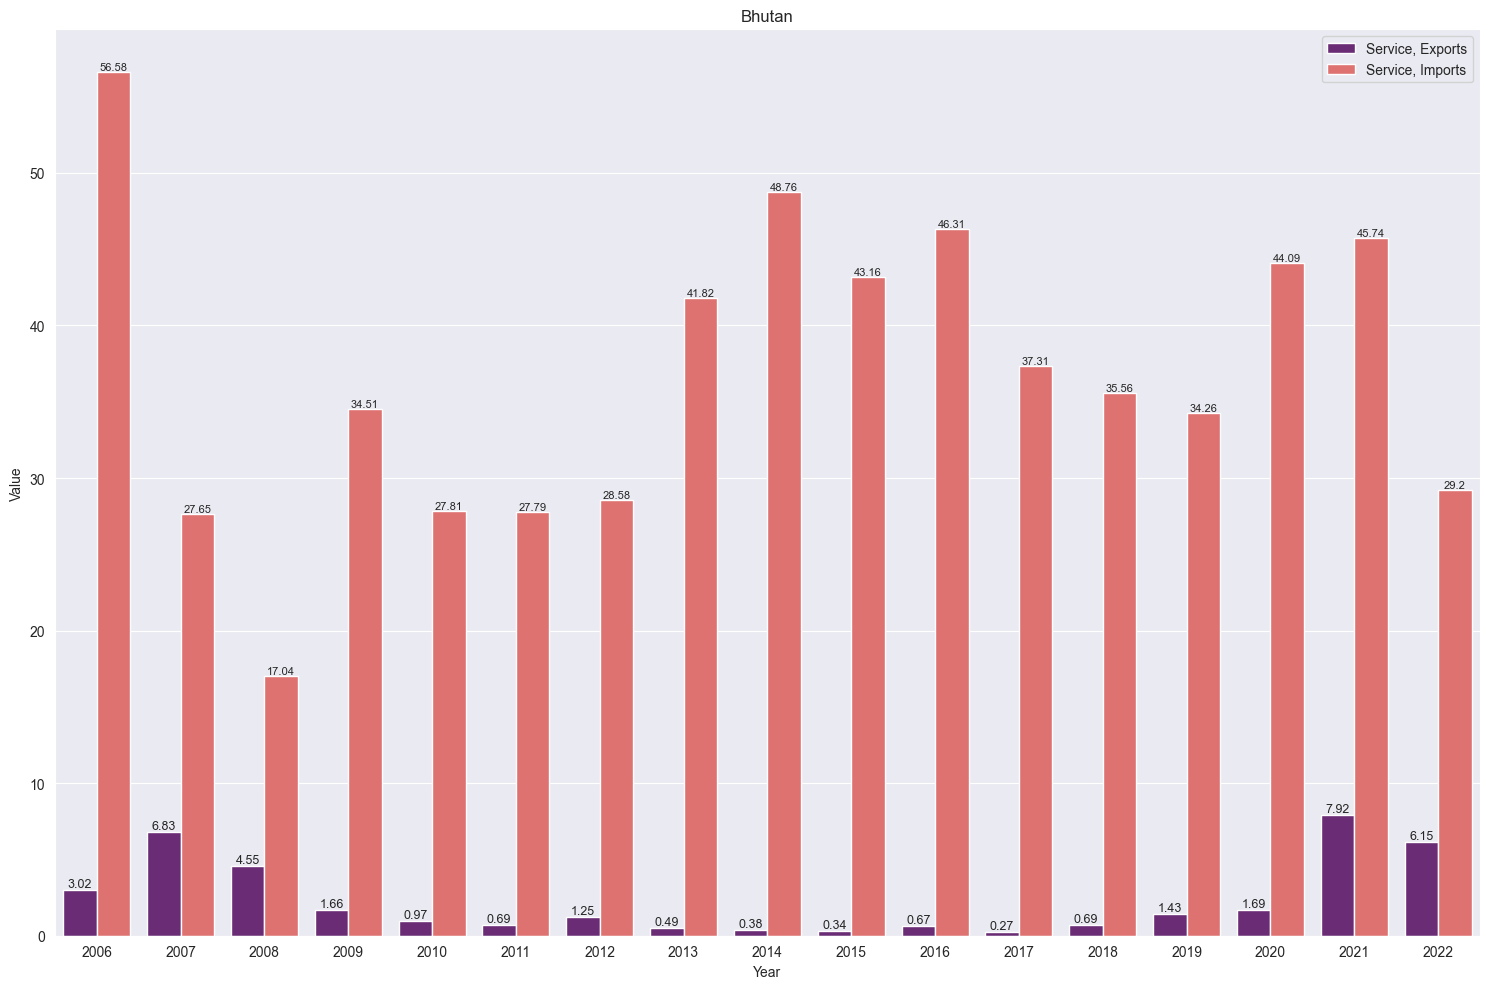

In [18]:
# Function call
cplots('Bhutan')

Bhutan entered the trading market in 2006 with an highest import. The lowest was in 2008. Exports show a decreasing trend from 2009 and hit an all time low in 2017. From 2018 exports increased and went as high as 7.92% in 2021. Bhutan is in a great trade deficit every year.

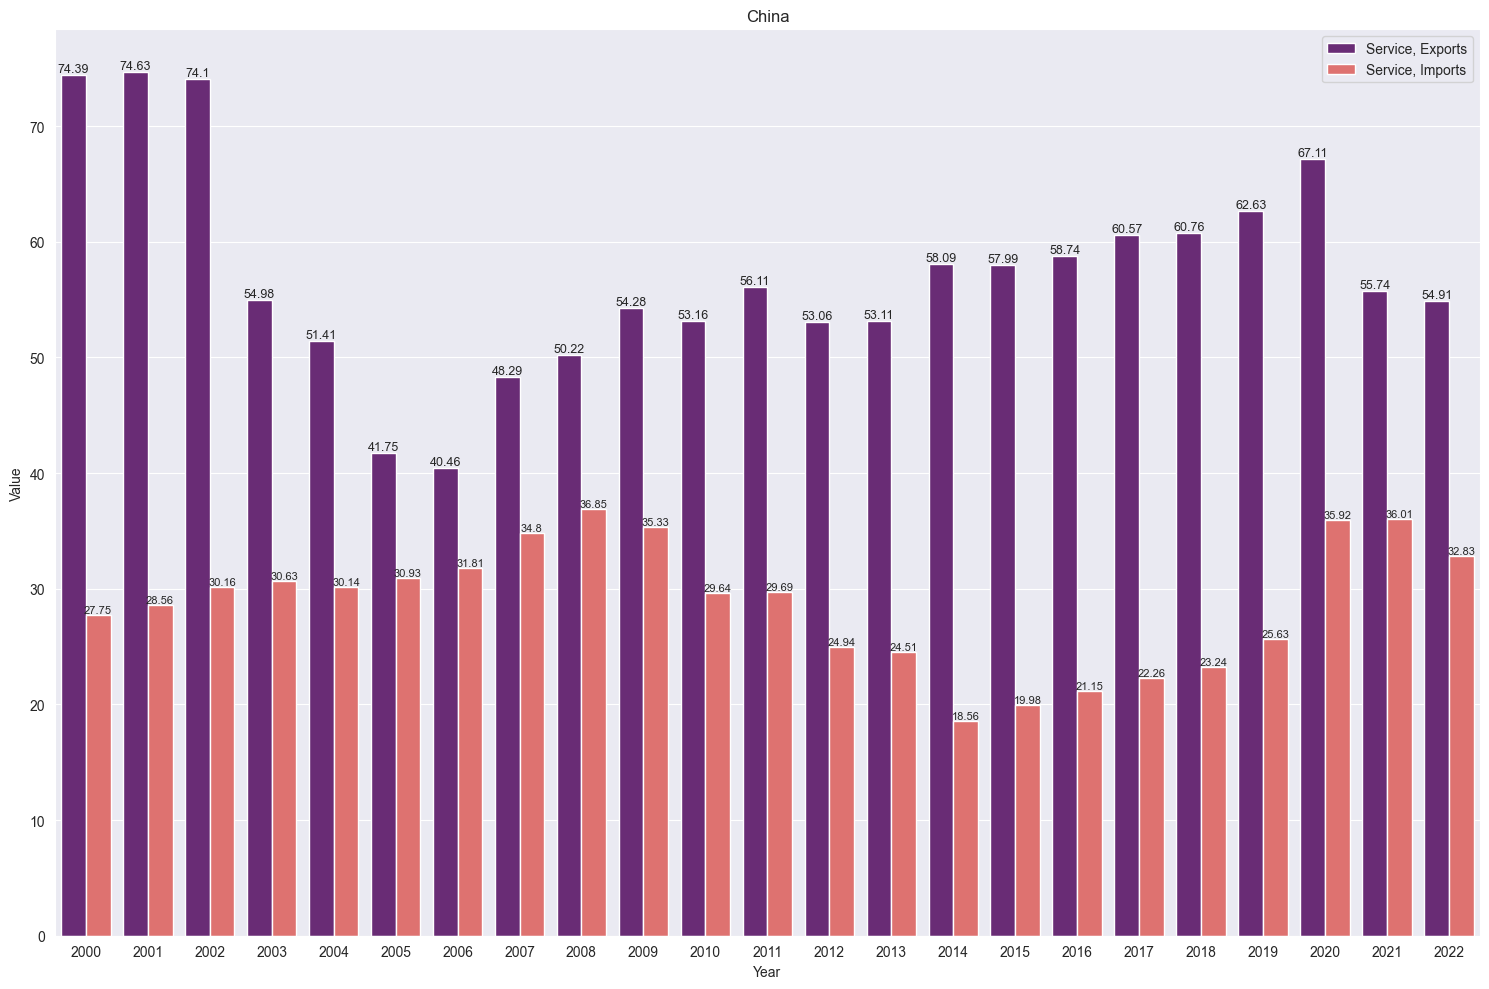

In [19]:
# Function call
cplots('China')

China shows a positive trade balance over the period. However, the percentage dropped in 2005 and 2006.

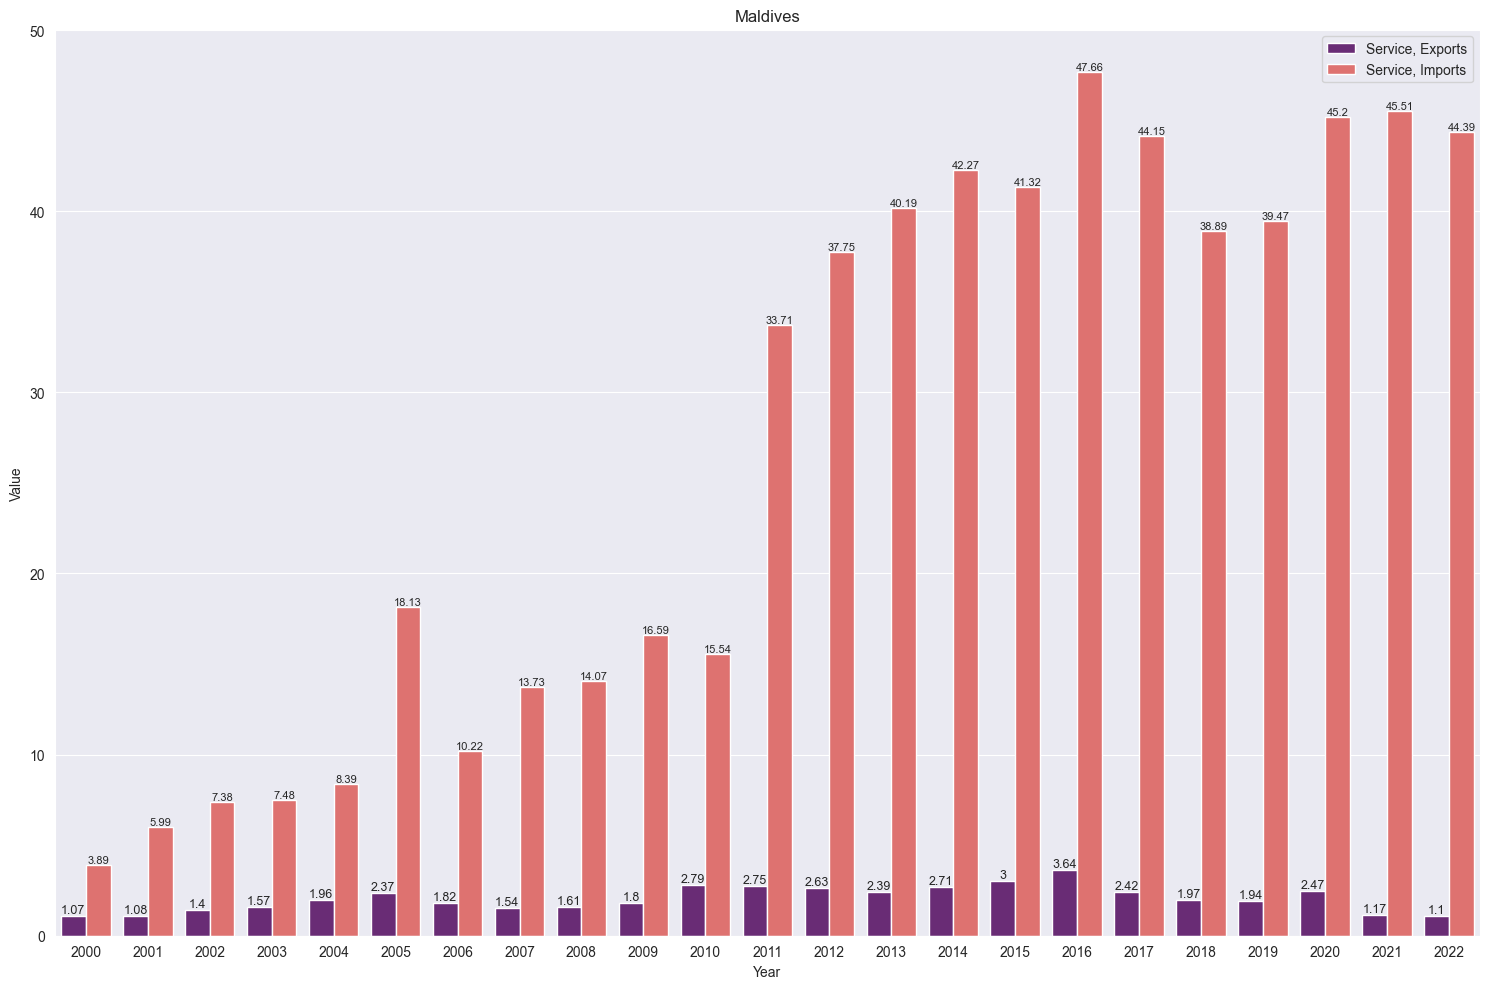

In [20]:
# Function call
cplots('Maldives')

Maldives is continuously in a trade deficit over the period 2000 - 2022. They imported maximum in 2017 and their export is low every year.

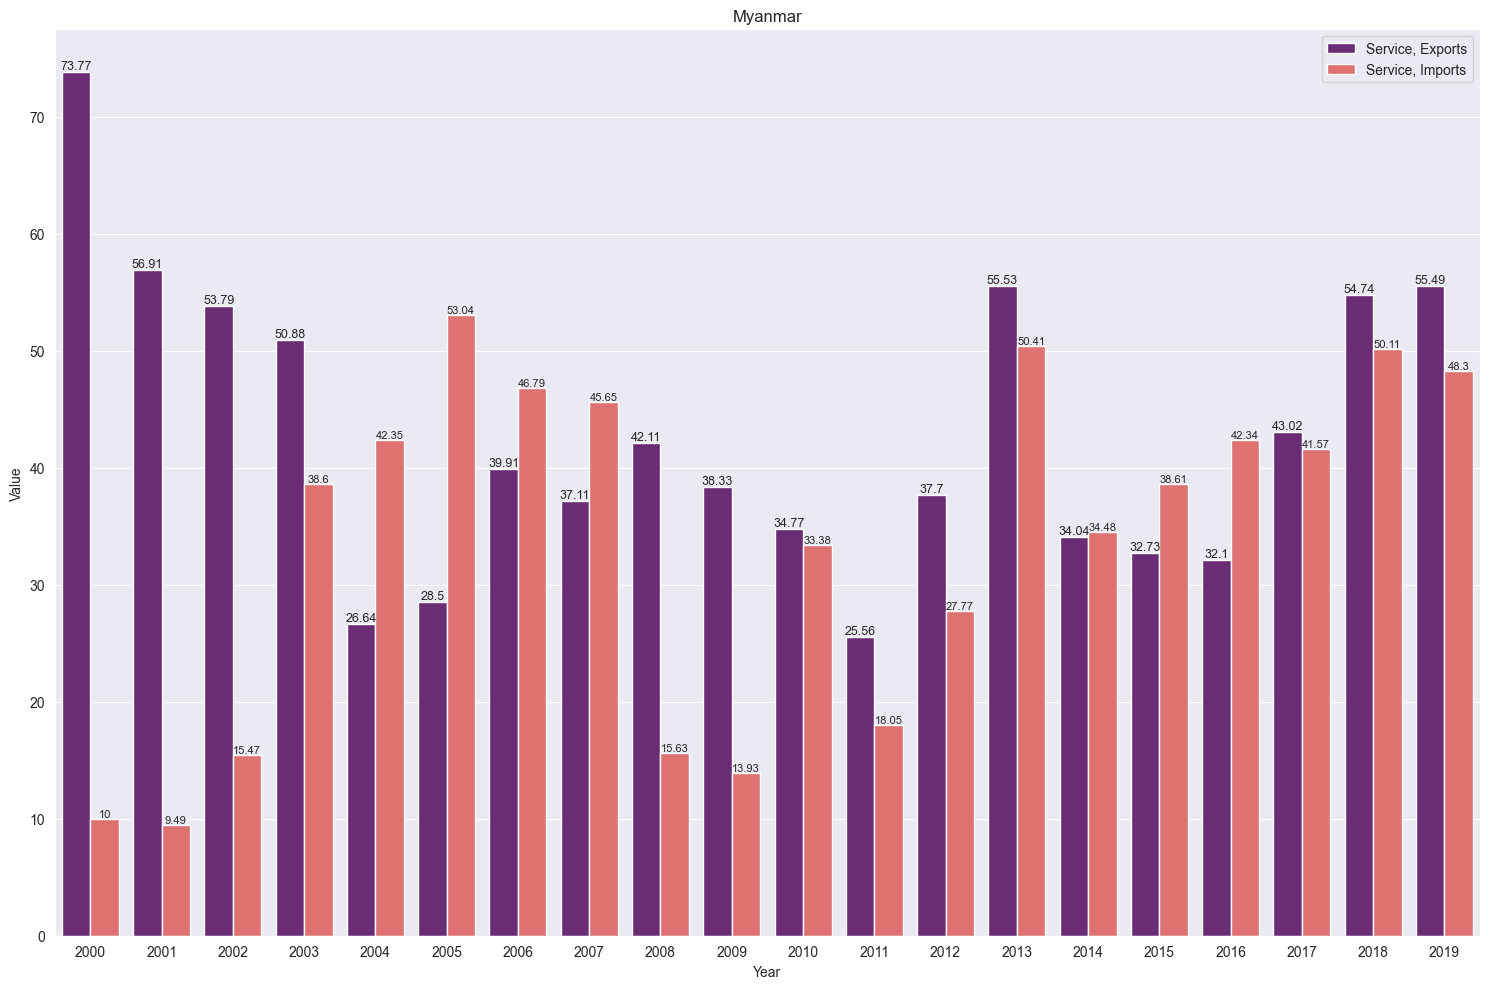

In [21]:
# Function call
cplots('Myanmar')

Myanmar participated in trade till 2019. They had greater positive trade balance in 2000-2002, with a 73.77% export in 2000. However, they witnessed trade deficit in 2004-2007 and again in 2014-2016. The most trade deficit was in the year 2005.

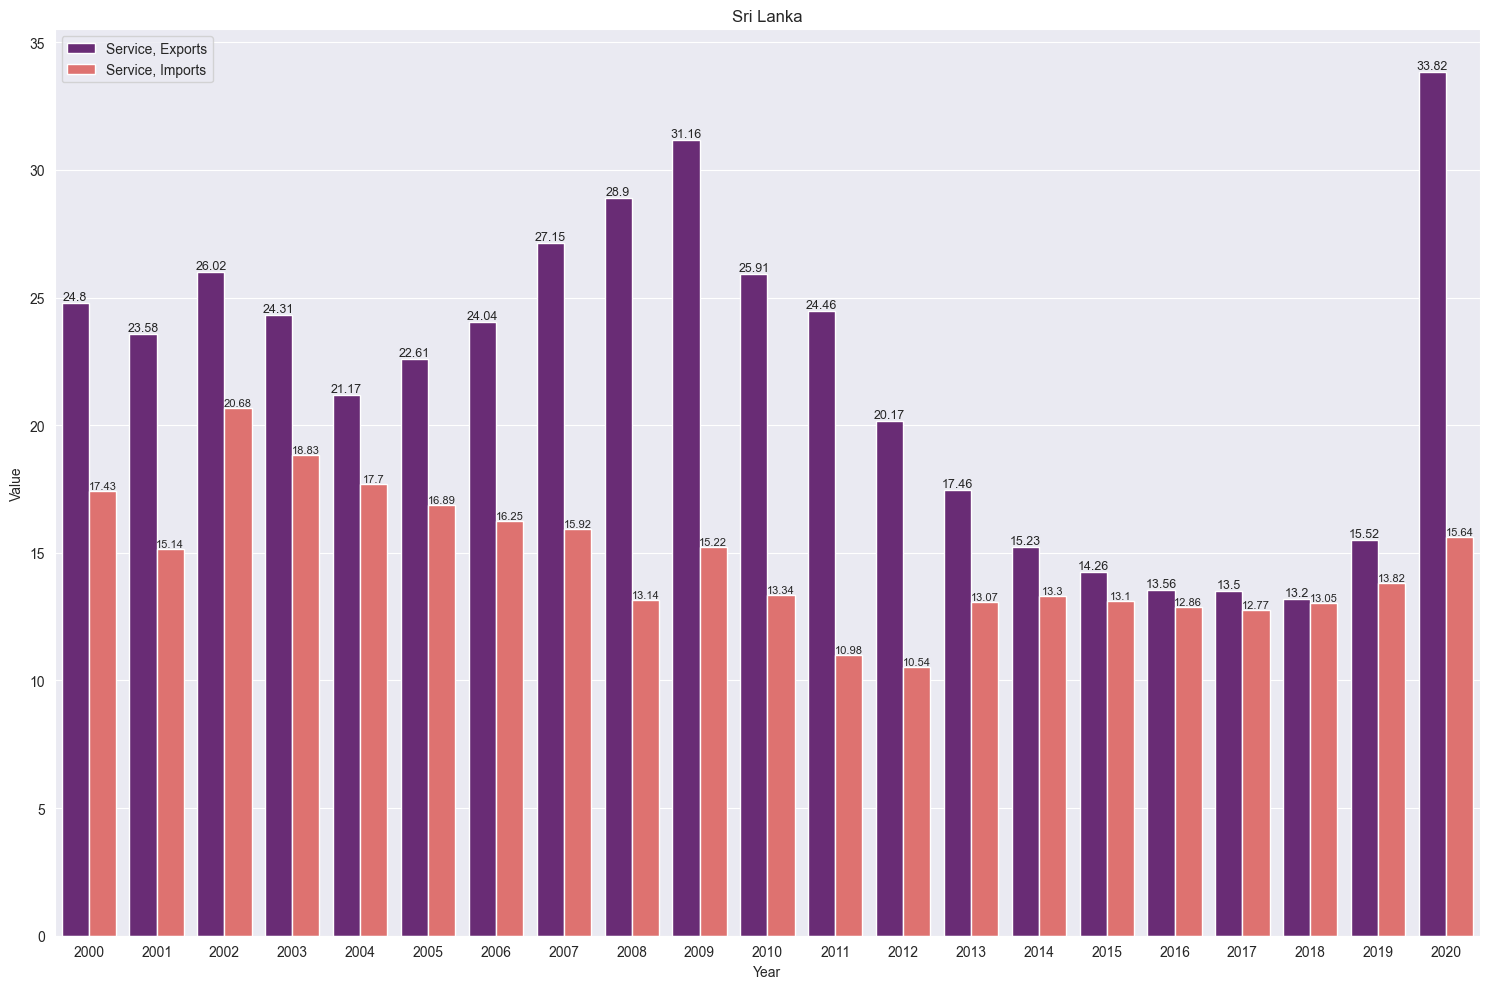

In [22]:
# Function call
cplots('Sri Lanka')

Sri Lanka stopped trading after 2020. Before that they had a tight trade balance from the year 2014-2019. In 2020, the trade balance was higher than previous years, export reached an all time high with 33.82%.

In [23]:
# Defining a list consisting of country names
c_list = ['India', 'Afghanistan', 'Bangladesh', 'Bhutan', 'China', 'Maldives', 'Myanmar', 'Nepal', 'Pakistan', 'Sri Lanka']

# Sorting the values for the year 2022
df = temp[(temp['Year']==2022) & (temp['Country Name'].isin(c_list))]
df.head()

,Country Name,Country Code,Series Name,Year,Value
9590,Bangladesh,BGD,"Service, Exports",2022,63.57
9591,Bangladesh,BGD,"Service, Imports",2022,11.51
9596,Bhutan,BTN,"Service, Exports",2022,6.15
9597,Bhutan,BTN,"Service, Imports",2022,29.20
9618,China,CHN,"Service, Exports",2022,54.91


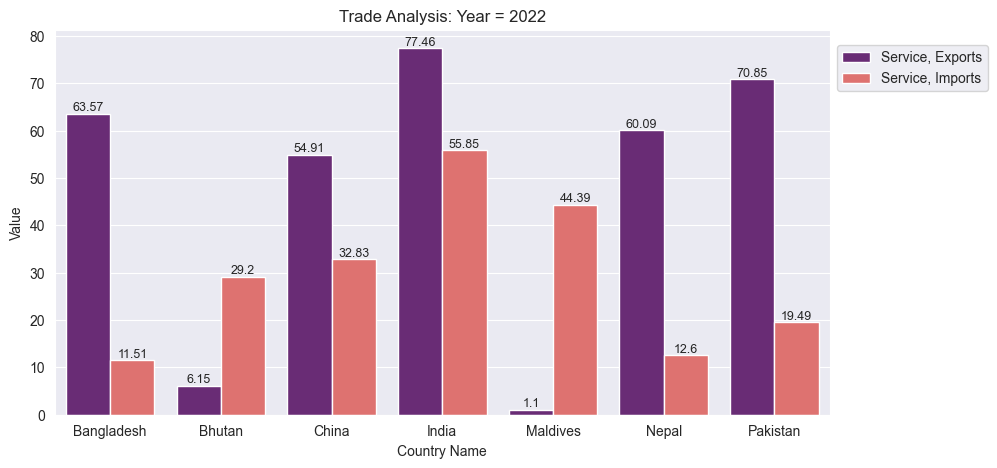

In [24]:
# Plotting import and export of the countries in c_list in 2022
plt.figure(figsize= (10,5))
c_plot = sns.barplot(df, x = 'Country Name', y = 'Value', hue= 'Series Name', palette= 'magma')
c_plot.bar_label(c_plot.containers[0], fontsize = 9)
c_plot.bar_label(c_plot.containers[1], fontsize = 9)
plt.title('Trade Analysis: Year = 2022')
plt.legend(bbox_to_anchor = (1,0.9), loc = 'center left')
plt.show()

<ul>
<li>Afghanistan, Myanmar and Srilanka did not participate in trade last year.</li>
<li>Among the rest, Bhutan and Maldives were in a huge trade deficit. </li>
<li>Bangladesh had the most positive trade balance, they export more Computer and other communication services than import.</li>
<li>India, on the other hand, had positive trade balance but it is on the lower side. There was not much difference in the export and import percentage of the communication services.</li>
</ul>

# Time Series Analysis

In [25]:
# Sorting the export data of India 2000 to 2022
# Setting 'Year' as the index
ind_exports = temp[(temp['Country Name'] == 'India') & (temp['Series Name'] == 'Service, Exports')].set_index(['Year'])
ind_exports.head()

,Country Name,Country Code,Series Name,Value
Year,,,,
2000,India,IND,"Service, Exports",60.88
2001,India,IND,"Service, Exports",61.97
2002,India,IND,"Service, Exports",63.95
2003,India,IND,"Service, Exports",63.00
2004,India,IND,"Service, Exports",67.49


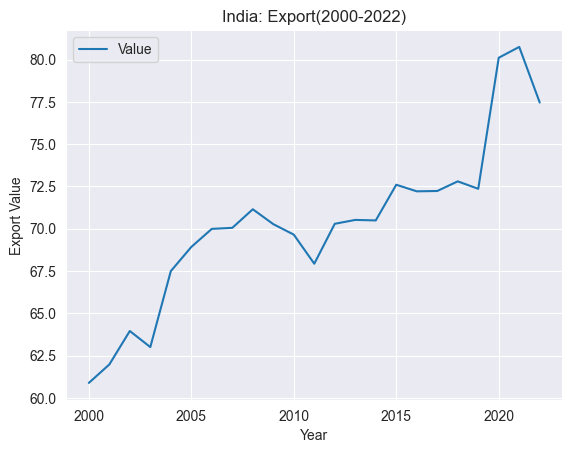

In [26]:
# Line plot of exports of India in 2000-2022
sns.lineplot(ind_exports)
plt.ylabel('Export Value')
plt.title('India: Export(2000-2022)')
plt.show()

The null hypothesis is that the series is non-stationary.<br> If the p-value is less than 0.05, then we reject the null hypothesis and say that the series is stationary.

In [27]:
# Checking stationarity using Augumented Dickey Fuller test with the default regression method 'c' (constant only)
adftest = adfuller(ind_exports['Value'], autolag='AIC')

print('ADF Statistics : ', adftest[0])
print('P-value: ', adftest[1])
print('Number of lags : ', adftest[2])
print('Number of observations : ', adftest[3])
print('Critical values : ', adftest[4])

ADF Statistics :  -0.8733171426730191
P-value:  0.7966324372037554
Number of lags :  9
Number of observations :  13
Critical values :  {'1%': -4.068853732362312, '5%': -3.1271488757396453, '10%': -2.7017297633136095}


p-value = 0.796 > 0.05. The null hypothesis is accepted. Hence the series is non-stationary.

In [28]:
# Checking stationarity using Augumented Dickey Fuller test with the default regression method 'ctt' (constant and linear and quadratic trend)
adftest = adfuller(ind_exports['Value'], autolag='AIC', regression='ctt')

print('ADF Statistics : ', adftest[0])
print('P-value: ', adftest[1])
print('Number of lags : ', adftest[2])
print('Number of observations : ', adftest[3])
print('Critical values : ', adftest[4])

ADF Statistics :  -1.1037934177237965
P-value:  0.9823800111250958
Number of lags :  7
Number of observations :  15
Critical values :  {'1%': -5.401849111111111, '5%': -4.316661555555556, '10%': -3.839590074074074}


In every case, the p-value is greater than 0.05. Hence the series is non-stationary.

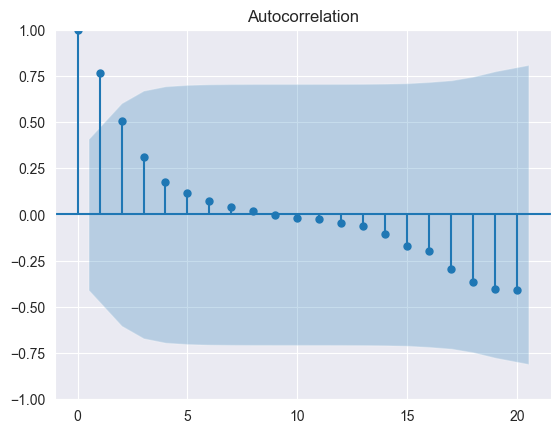

In [29]:
# Plotting autocorrelation between ind_export values
plot_acf(ind_exports['Value'].dropna(), lags=20)
plt.show()

Another way to show the non-stationarity is to plot the autocorrelation of the export values. If the autocorrelation value vanishes rapidly, then the data is defined as stationary. <br> 
In the above figure, the autocorrelation value decreases to 0 and then goes to the negative side. Hence the data is highly non-stationary.<br>
<br>The number of data points in the dataframe ind_exports is 12, which is significantly less to perform tests to identify and remove non-stationarity. Since all the Time Series Analysis models can be performed only on stationary data, we cannot proceed with this data anymore.